# Analysing tree sequences

In [1]:
import tskit

Load a larger example TS. 

In [2]:
ts = tskit.load("sheepTSexample-main/test1M.out.inf.ts")

In [3]:
ts

This is simulated data that was output  in MS format from which the TS was inferred.

**Genomes and breeds:**
* 0-9 mouflon
* 10-109 Iranian
* 110-209 Border

In [4]:
ts.first()

In inferred TSs the first tree can look funny.

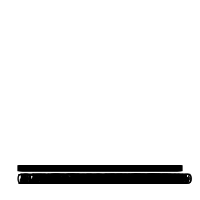

In [6]:
ts.first().draw_svg()

Let's move further along the genome...

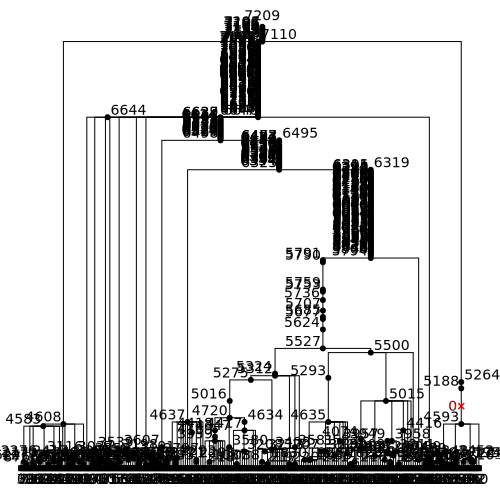

In [8]:
ts.at(110).draw_svg(size=(500,500))

There are numerour 'unary' nodes (along branches that don't split). These can be removed using `simplify()` 

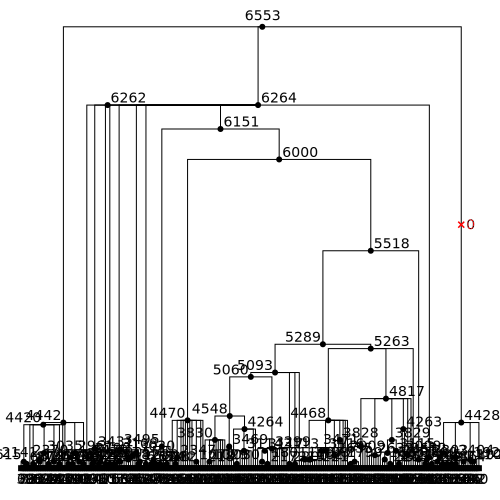

In [9]:
ts.simplify().at(110).draw_svg(size=(500,500))

`ts.simplify()` can also down-sample your ts!

In [10]:
ts

Let us select 5 haplotypes each from mouflon, Iranian, and Border sheep:

In [11]:
ts.simplify([0,1,2,3,4,  10,11,12,13,14, 110,111,112,113,114])

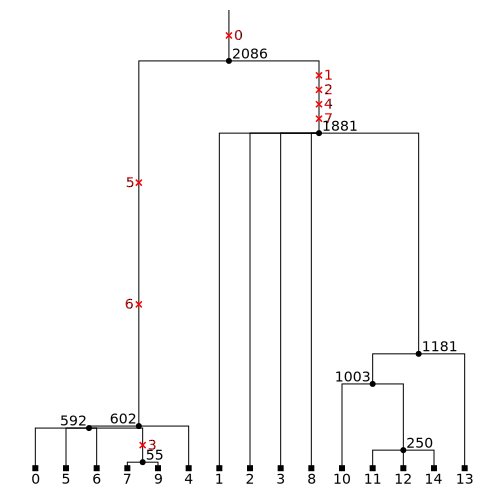

In [12]:
ts.simplify([0,1,2,3,4,  10,11,12,13,14, 110,111,112,113,114]).at(110).draw_svg(size=(500,500))

Let us label the tips. We need to supply a dictionary for this. Feel free to skip forward to the GT matrix.

Lists in Python are created with square brackets `[]` indexing into lists is also done with square brackets. The example below selects the 2nd item (in 0-based counting) from the leis of letters:

In [13]:
["M", "I", "B"][2]

'B'

Using a dict expression to make a dictionary by looping and using integer division (`//`).

In [14]:
{i:["M", "I", "B"][i//5] for i in range(15)}

{0: 'M',
 1: 'M',
 2: 'M',
 3: 'M',
 4: 'M',
 5: 'I',
 6: 'I',
 7: 'I',
 8: 'I',
 9: 'I',
 10: 'B',
 11: 'B',
 12: 'B',
 13: 'B',
 14: 'B'}

Supply that dict to label the tree tips:

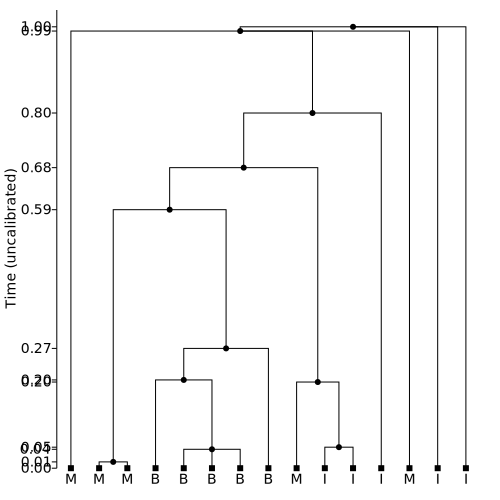

In [15]:
ts.simplify([0,1,2,3,4,  10,11,12,13,14, 110,111,112,113,114]).at(10000).draw_svg(
    size=(500,500),
    omit_sites=True,
    node_labels={i:["M", "I", "B"][i//5] for i in range(15)},
    y_axis=True)

B(order) genomes always group together, but the 'outgroup' mouflon is mixed with the Iranian sheep. Why?

## Inspect GT matrix

In [16]:
ts.genotype_matrix()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [17]:
import matplotlib.pyplot as plt

`imshow()` in Python is like `image()` in R.

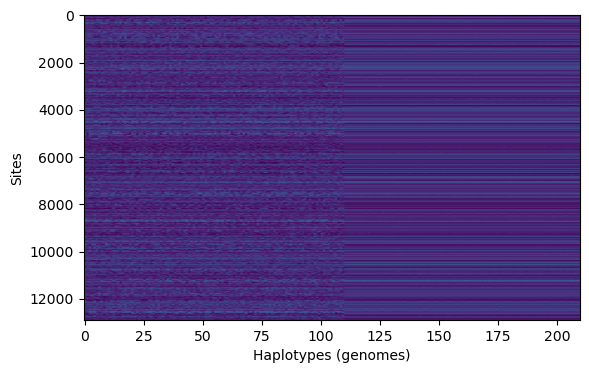

In [18]:
plt.imshow(ts.genotype_matrix(), aspect=1/100)
plt.ylabel("Sites")
plt.xlabel("Haplotypes (genomes)")
plt.show()

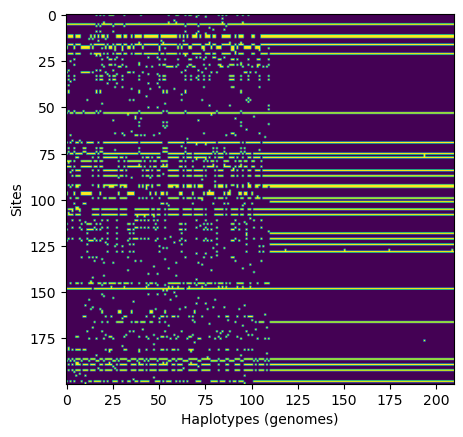

In [19]:
plt.imshow(ts.genotype_matrix()[:200,:])
plt.ylabel("Sites")
plt.xlabel("Haplotypes (genomes)")
plt.show()

## Genetic statistics

In [20]:
import numpy as np

A statistic for individuals populations:

In [22]:
ts.diversity()

0.0013289906128959245

In [23]:
# Mouflon, Iranian, Border
ts.diversity([range(10), range(10,110), range(110,210)]) *100

array([0.15622   , 0.16615093, 0.00182616])

Fst is a two-way statistic (in this implementation here compares two pops/sets of genomes).

In [24]:
# Mouflon - Iranian
ts.Fst([range(10), range(10,110)])

0.0474287776006701

Is more sets are supplied, the `indexes` argument is used to supply a list of pairs. The results are M-I, M-B, I-B.

In [26]:
ts.Fst([range(10), range(10,110), range(110, 210)], indexes=[[0,1],[0,2],[1,2]])

array([0.04742878, 0.38632402, 0.34437358])

Make window breaks for windowed $F_{ST}$ analysis:

In [28]:
np.linspace(0, 1e6, 101)

array([      0.,   10000.,   20000.,   30000.,   40000.,   50000.,
         60000.,   70000.,   80000.,   90000.,  100000.,  110000.,
        120000.,  130000.,  140000.,  150000.,  160000.,  170000.,
        180000.,  190000.,  200000.,  210000.,  220000.,  230000.,
        240000.,  250000.,  260000.,  270000.,  280000.,  290000.,
        300000.,  310000.,  320000.,  330000.,  340000.,  350000.,
        360000.,  370000.,  380000.,  390000.,  400000.,  410000.,
        420000.,  430000.,  440000.,  450000.,  460000.,  470000.,
        480000.,  490000.,  500000.,  510000.,  520000.,  530000.,
        540000.,  550000.,  560000.,  570000.,  580000.,  590000.,
        600000.,  610000.,  620000.,  630000.,  640000.,  650000.,
        660000.,  670000.,  680000.,  690000.,  700000.,  710000.,
        720000.,  730000.,  740000.,  750000.,  760000.,  770000.,
        780000.,  790000.,  800000.,  810000.,  820000.,  830000.,
        840000.,  850000.,  860000.,  870000.,  880000.,  8900

In [29]:
fst = ts.Fst([range(10), range(10,110), range(110, 210)],
             indexes=[[0,1],[0,2],[1,2]],
             windows=np.linspace(0, 1e6, 101)
)

In [30]:
fst

array([[-0.00148611,  0.33125526,  0.28767722],
       [ 0.03822573,  0.29689609,  0.29382923],
       [ 0.03722879,  0.36187683,  0.23593552],
       [ 0.01841349,  0.28271028,  0.28712286],
       [-0.00230967,  0.35783022,  0.29919829],
       [ 0.00836832,  0.21336027,  0.30741892],
       [ 0.00932065,  0.2498826 ,  0.21963887],
       [ 0.0819011 ,  0.58766234,  0.45881472],
       [ 0.06329854,  0.48170732,  0.37852902],
       [ 0.00198553,  0.37348816,  0.37910162],
       [ 0.02232192,  0.37195122,  0.32105203],
       [ 0.01829904,  0.33231496,  0.27907158],
       [ 0.04426486,  0.38129496,  0.37888216],
       [ 0.0740787 ,  0.56463596,  0.41972234],
       [ 0.17472445,  0.5804878 ,  0.27692578],
       [ 0.03661672,  0.41710825,  0.34374841],
       [ 0.02445916,  0.528125  ,  0.42669423],
       [ 0.01552383,  0.37637363,  0.37274525],
       [ 0.06123908,  0.23126574,  0.18267459],
       [ 0.05099046,  0.55518395,  0.36442256],
       [ 0.07125717,  0.34505512,  0.393

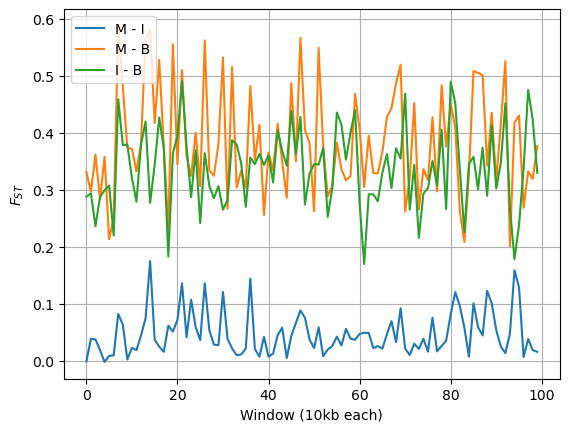

In [32]:
plt.plot(range(100), fst[:,0], label="M - I")
plt.plot(range(100), fst[:,1], label="M - B")
plt.plot(range(100), fst[:,2], label="I - B")
plt.legend()
plt.ylabel("$F_{ST}$")
plt.xlabel("Window (10kb each)")
plt.grid()
plt.show()

Genealogically nearest neighbours. Weighted by the intervall length of each tree, from which set of genomes comes the closest relative? Here, we compare 4 mouflan genomes to mouflon, Iranian, and Border. The resulting array has one row for each of our 4 mouflon genomes:

In [33]:
ts.genealogical_nearest_neighbours([0,1,2,3], [range(1,10), range(10,110), range(110,210)])

array([[0.59771033, 0.36771007, 0.0345796 ],
       [0.46549907, 0.50334881, 0.03115212],
       [0.50856275, 0.45384775, 0.0375895 ],
       [0.65435948, 0.3265888 , 0.01905173]])

Do the same for Border sheep, they are more obviously related to other Border sheep.

In [35]:
ts.genealogical_nearest_neighbours(range(110,120), [range(1,10), range(10,110), range(110,210)])

array([[0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.00107861, 0.00550263, 0.99341877],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ]])

Looking into runs of homozygosity. I.e. what is the distribution of distances between heterozygous sites?

In [37]:
ts.diversity([0,1])

0.001521

Make a logical vector of whether a site is homozygous or not:

In [38]:
np.sum(ts.genotype_matrix()[:,:2],axis=1)!=1

array([ True,  True,  True, ...,  True,  True,  True])

Use this vector for logical indexing -> to retain only the location of heterozygous sites:

In [39]:
hetPos = ts.sites_position[np.invert(np.sum(ts.genotype_matrix()[:,:2],axis=1)!=1)]

In [40]:
hetPos.shape

(1521,)

Get the distances between these:

In [41]:
np.diff(hetPos).shape

(1520,)

Make this general, create a function that takes the genome IDs and that returns the distribution of the distances between subsequent heterozygous sites: 

In [42]:
def getRohLens(g0, g1, tr=20000):
    """
    g0 - genome DI (an integer
    g1 - another genome ID (integer)
    tr - threshold length, shorter distances are discarded
    """
    hp = ts.sites_position[np.invert(np.sum(ts.genotype_matrix()[:,[g0, g1]],axis=1)!=1)]
    dd = np.diff(hp)
    return dd[dd>=tr]
    

In [43]:
getRohLens(0,1)

array([20077.22640151])

Plot the ROH legth distributions for one of each 'breed':

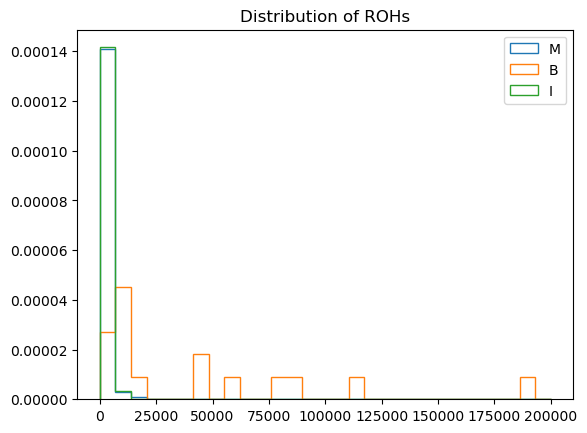

In [53]:
tr=1000
bins = np.linspace(0, 200_000, 30)
plt.hist(getRohLens(0,1,tr=tr), histtype="step", label="M", density=True, bins=bins)
plt.hist(getRohLens(110,111,tr=tr), histtype="step", label="B", density=True, bins=bins)
plt.hist(getRohLens(10,11,tr=tr), histtype="step", label="I", density=True, bins=bins)
plt.title("Distribution of ROHs")
plt.legend()
plt.show()

Inbred Border has the longest ROHs.